## Crime data exploration and Chropleth map

In [64]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

### metropolitan_outcomes_data.csv

In [2]:
df = pd.read_csv('2013-2024/metropolitan_outcomes_data.csv')

In [3]:
df.head()

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Hammersmith and Fulham 012D,Offender given a drugs possession warning
1,750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...,2013-01,-0.203552,51.491597,On or near Shopping Area,E01001870,Hammersmith and Fulham 012D,Investigation complete; no suspect identified
2,21938f414ed8b80c3a02b659832702736a595a541d5574...,2013-01,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Hammersmith and Fulham 012E,Investigation complete; no suspect identified
3,38a2922207338b6ff65203c3c292371402925a9651e2ea...,2013-01,-0.212671,51.493427,On or near AURIOL ROAD,E01001871,Hammersmith and Fulham 012E,Suspect charged
4,f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...,2013-01,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Hammersmith and Fulham 012E,Investigation complete; no suspect identified


In [ ]:
df.

In [47]:
df.shape # almost 7 mln

(6855314, 8)

In [8]:
df.isna().sum()

Crime ID             0
Month                0
Longitude       138519
Latitude        138519
Location             0
LSOA code       138519
LSOA name       138519
Outcome type         0
dtype: int64

In [26]:
print(f"Missing coordinates in {df.Longitude.isna().sum() / len(df) *100:.2f} % of the data points")

Missing coordinates in 2.02 % of the data points


#### Bar charts

In [64]:
lsoa_count = df['LSOA code'].value_counts()
frequent_lsoa_codes = lsoa_count[lsoa_count > 1000].index
filtered_df = df[df['LSOA code'].isin(frequent_lsoa_codes)]
filtered_df.head(2)

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
11,6c7987a14b14d3fa9b38c82db5e0025a5028f48724b0ca...,2013-01,-0.227329,51.519242,On or near NORTH POLE ROAD,E01001874,Hammersmith and Fulham 001A,Suspect charged as part of another case
12,6b5d10255218ec0ed48e0b81be494fc61689c1a497f156...,2013-01,-0.226481,51.517314,On or near NASCOT STREET,E01001874,Hammersmith and Fulham 001A,Suspect charged as part of another case


In [80]:
plot_data = filtered_df['LSOA code'].value_counts()

plot_data_ = plot_data.head(50)

filtered_lsoa_names = filtered_df[['LSOA code', 'LSOA name']].drop_duplicates('LSOA code')

result_df = pd.merge(plot_data_, 
                     filtered_lsoa_names, 
                     on='LSOA code', 
                     how='inner')

In [81]:
result_df

,LSOA code,count,LSOA name
0,E01004734,56029,Westminster 018A
1,E01033595,55371,Westminster 013E
2,E01004763,49541,Westminster 013B
3,E01004736,30036,Westminster 018C
4,E01002968,25377,Kingston upon Thames 009C
5,E01002444,25307,Hillingdon 031A
6,E01033583,23525,Newham 013G
7,E01004714,22900,Westminster 011B
8,E01004735,21633,Westminster 018B
9,E01001943,19704,Hammersmith and Fulham 004A


<Figure size 1000x600 with 0 Axes>

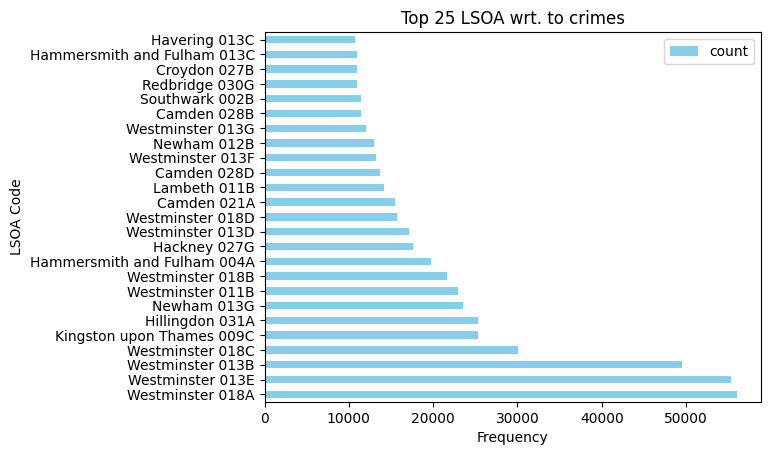

In [88]:
plt.figure(figsize=(10, 6))  

result_df[:25].plot(kind='barh', color='skyblue', x='LSOA name')

plt.ylabel('LSOA Code')
plt.xlabel('Frequency')
plt.title('Top 25 LSOA wrt. to crimes');

In [53]:
df['Outcome type'].unique()

array(['Offender given a drugs possession warning',
       'Investigation complete; no suspect identified', 'Suspect charged',
       'Suspect charged as part of another case',
       'Offender given a caution', 'Offender given penalty notice',
       'Unable to prosecute suspect', 'Local resolution',
       'Offender given conditional discharge',
       'Offender given community sentence', 'Offender sent to prison',
       'Offender fined', 'Offender given suspended prison sentence',
       'Offender ordered to pay compensation',
       'Offender deprived of property', 'Defendant found not guilty',
       'Court case unable to proceed', 'Offender otherwise dealt with',
       'Offender given absolute discharge',
       'Defendant sent to Crown Court',
       'Formal action is not in the public interest'], dtype=object)

In [54]:
len(df['Outcome type'].unique())

21

In [6]:
outcome_counts = df['Outcome type'].value_counts()

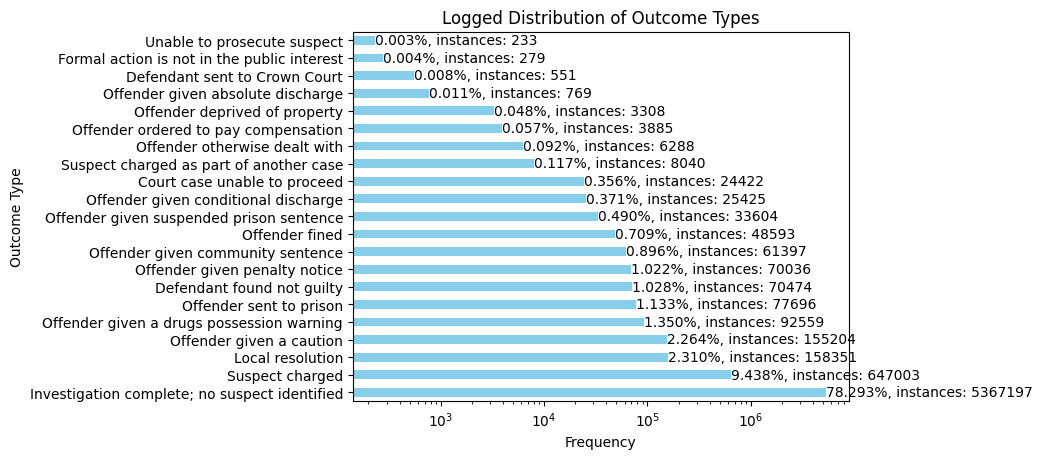

In [29]:
outcome_counts = df['Outcome type'].value_counts()

total_counts = outcome_counts.sum()

ax = outcome_counts.plot(kind='barh', color='skyblue', logx=True)

plt.title('Logged Distribution of Outcome Types')
plt.ylabel('Outcome Type')
plt.xlabel('Frequency')

for index, value in enumerate(outcome_counts):
    plt.text(value, 
             index, 
             f'{(value/total_counts)*100:.3f}%, instances: {value}', 
             va='center')

plt.show()

In [135]:
plot_data = filtered_df['LSOA code'].value_counts()
plot_data

LSOA code
E01004734    56029
E01033595    55371
E01004763    49541
E01004736    30036
E01002968    25377
             ...  
E01003151     1003
E01033729     1003
E01002675     1002
E01001982     1001
E01001588     1001
Name: count, Length: 2269, dtype: int64

### metropolitan_street_data

In [39]:
df2 = pd.read_csv('2013-2024/metropolitan_street_data.csv')

In [49]:
df2.shape # almost 11 mln

(10711783, 9)

In [41]:
cleaned_df = df2.dropna(subset=['Crime ID'])

### intersection of the files

In [43]:
common_elements = np.intersect1d(df['Crime ID'], cleaned_df['Crime ID'])

In [45]:
len(common_elements) # intersection is 5 mln

5414972

### Choropleth map

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

To use Geopandas we need a file that describes the shape of the area we want to plot on. 

I found it here: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

file name: `statistical-gis-boundaries-london.zip`  (27.34 MB)

The file we need from this folder of geographical data is the one with extension .shp. I load it here below.

The `shape` variable contains a geopandas dataframe (same as a pandas one, with some geopandas specificities). What we care about is the column `LSOA11CD` which contains the code of the LSOA (same as the one on our crime data file, column `LSOA Code`).

If we join the value count dataframe of the crime data and the shape df on this commmon column we have all we need to plot things.

In [5]:
shape_path = 'Shapefiles/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp'

In [6]:
shape = gpd.read_file(shape_path) # just a dataframe under the hood

shape.head() # first column represents LSOA CODE

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [191]:
plot_data = df['LSOA code'].value_counts()
plot_data

LSOA code
E01004734    56029
E01033595    55371
E01004763    49541
E01004736    30036
E01002968    25377
             ...  
E01030836        1
E01013687        1
E01005106        1
E01009393        1
E01017444        1
Name: count, Length: 9713, dtype: int64

In [192]:
shape_new = pd.merge(
    left=shape,
    right=plot_data,
    left_on='LSOA11CD', # shape column name
    right_on='LSOA code', # df column name
    how='left' #we only want to plot LSOA's for which we have data
)

In [193]:
shape_new.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry', 'count'],
      dtype='object')

In [194]:
shape_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LSOA11CD   4835 non-null   object  
 1   LSOA11NM   4835 non-null   object  
 2   MSOA11CD   4835 non-null   object  
 3   MSOA11NM   4835 non-null   object  
 4   LAD11CD    4835 non-null   object  
 5   LAD11NM    4835 non-null   object  
 6   RGN11CD    4835 non-null   object  
 7   RGN11NM    4835 non-null   object  
 8   USUALRES   4835 non-null   int64   
 9   HHOLDRES   4835 non-null   int64   
 10  COMESTRES  4835 non-null   int64   
 11  POPDEN     4835 non-null   float64 
 12  HHOLDS     4835 non-null   int64   
 13  AVHHOLDSZ  4835 non-null   float64 
 14  geometry   4835 non-null   geometry
 15  count      4834 non-null   float64 
dtypes: float64(3), geometry(1), int64(4), object(8)
memory usage: 604.5+ KB


In [195]:
shape_new.isna().sum()

LSOA11CD     0
LSOA11NM     0
MSOA11CD     0
MSOA11NM     0
LAD11CD      0
LAD11NM      0
RGN11CD      0
RGN11NM      0
USUALRES     0
HHOLDRES     0
COMESTRES    0
POPDEN       0
HHOLDS       0
AVHHOLDSZ    0
geometry     0
count        1
dtype: int64

In [197]:
# log counts
shape_clean = shape_new
shape_clean['count_log'] = np.log(shape_clean['count'])

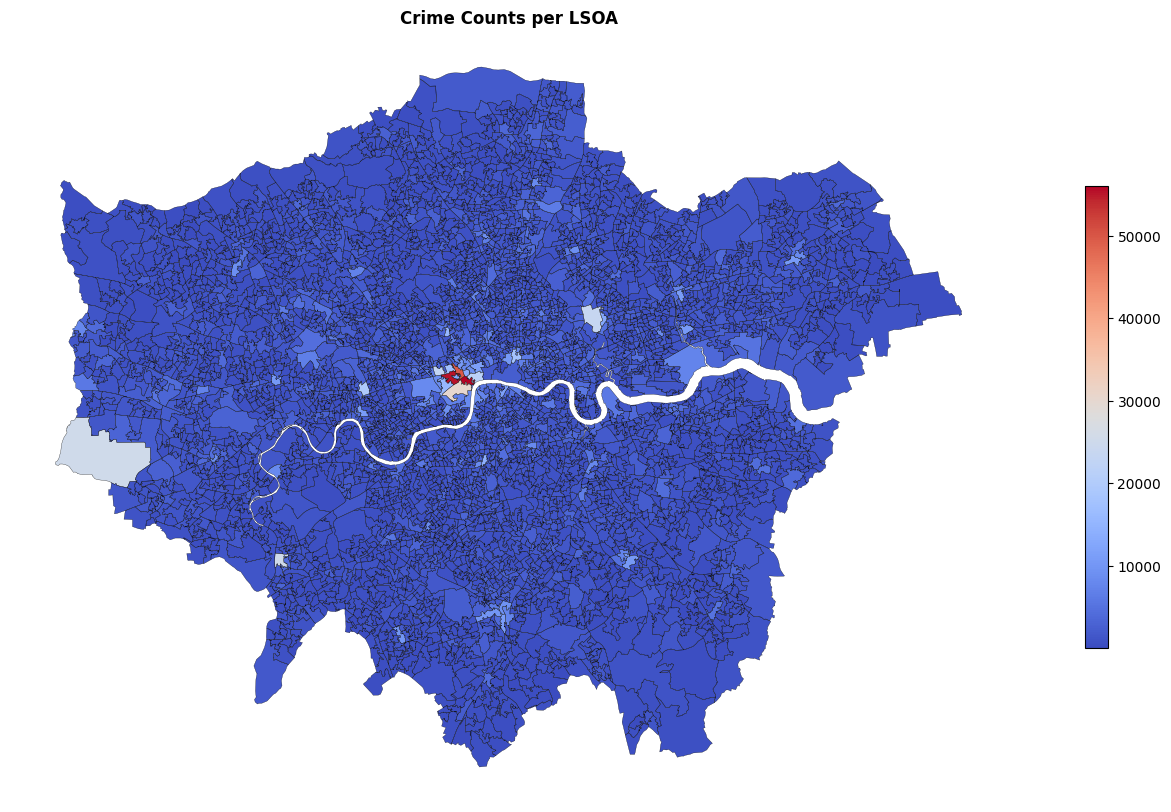

In [201]:
# plot 1

ax = shape_clean.boundary.plot(edgecolor='black', 
                             linewidth=0.2, 
                             figsize=(20,10))
shape_clean.plot(ax=ax, 
                 column='count', # NON-LOGGED
                 legend=True, 
                 cmap='coolwarm',
                 legend_kwds={'shrink':0.6}) # extras: legend_kwds={'shrink':1, 'orientation':'horizontal'}

# to remove the axis cause they don't mean much
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Crime Counts per LSOA', weight='bold')

plt.savefig('Crime Counts per LSOA.jpeg', dpi=600)
plt.show()

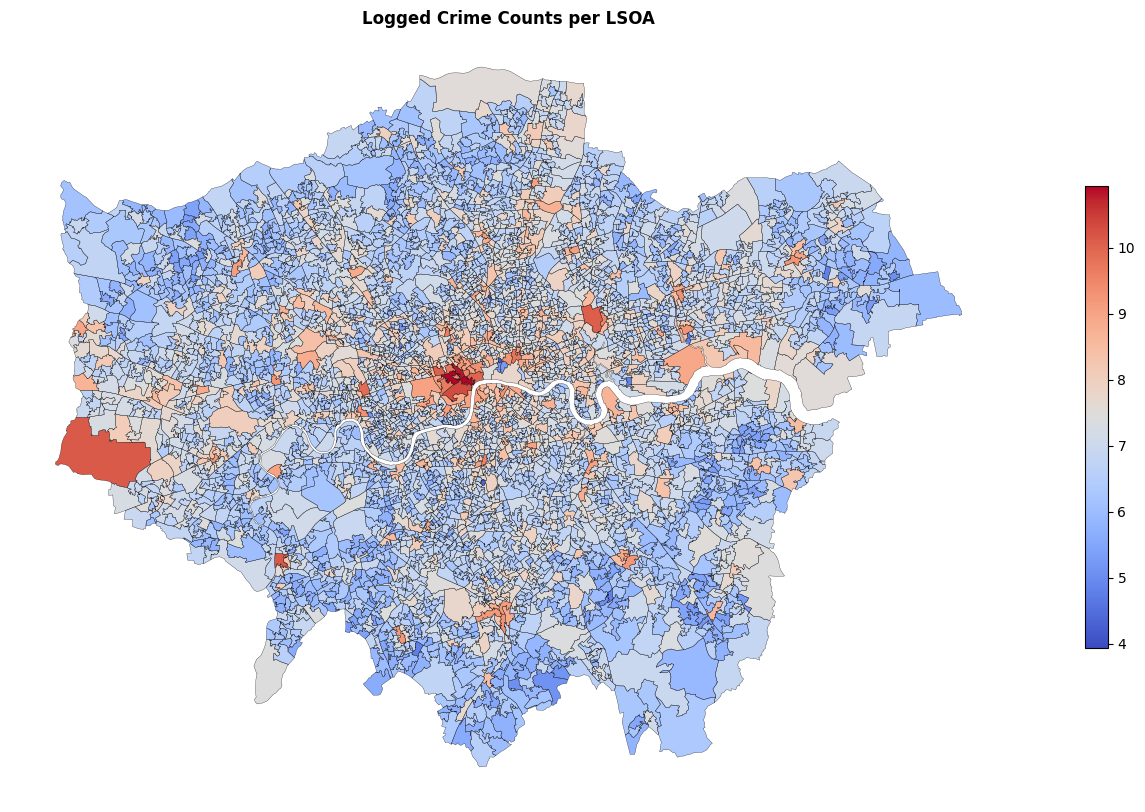

In [200]:
# plot 2

ax = shape_clean.boundary.plot(edgecolor='black', 
                             linewidth=0.2, 
                             figsize=(20,10))
shape_clean.plot(ax=ax, 
                 column='count_log', # LOGGED DATA
                 legend=True, 
                 cmap='coolwarm',
                 legend_kwds={'shrink':0.6}) # extras: legend_kwds={'shrink':1, 'orientation':'horizontal'}

# to remove the axis cause they don't mean much
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Logged Crime Counts per LSOA', weight='bold')

plt.savefig('Logged Crime Counts per LSOA.jpeg', dpi=600)
plt.show()

### chropleth 2: crime data per borough

#### Chropleth

In [35]:
shape_path = 'Shapefiles/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'

shape = gpd.read_file(shape_path) # just a dataframe under the hood

shape.head() # first column represents LSOA CODE

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [36]:
df_borough = pd.read_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')
df_borough.head()

,Unnamed: 0,Crime ID,Month,Longitude,Latitude,Location,LSOA code,Outcome type,LSOA_Name,BoroughName
0,0,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Offender given a drugs possession warning,Hammersmith and Fulham 012D,Hammersmith and Fulham
1,1,750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...,2013-01,-0.203552,51.491597,On or near Shopping Area,E01001870,Investigation complete; no suspect identified,Hammersmith and Fulham 012D,Hammersmith and Fulham
2,2,21938f414ed8b80c3a02b659832702736a595a541d5574...,2013-01,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Investigation complete; no suspect identified,Hammersmith and Fulham 012E,Hammersmith and Fulham
3,3,38a2922207338b6ff65203c3c292371402925a9651e2ea...,2013-01,-0.212671,51.493427,On or near AURIOL ROAD,E01001871,Suspect charged,Hammersmith and Fulham 012E,Hammersmith and Fulham
4,4,f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...,2013-01,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Investigation complete; no suspect identified,Hammersmith and Fulham 012E,Hammersmith and Fulham


In [58]:
df_plot = df_borough.BoroughName.value_counts()

In [59]:
df_plot = df_plot.to_frame(name='count').reset_index()
df_plot.columns = ['BoroughName', 'count']

In [60]:
df_plot

,BoroughName,count
0,Westminster,414348
1,Lambeth,227720
2,Southwark,220790
3,Newham,214413
4,Camden,212567
5,Croydon,208887
6,Tower Hamlets,206991
7,Hackney,194592
8,Ealing,192755
9,Brent,188702


In [61]:
shape_new = pd.merge(
    left=shape,
    right=df_plot,
    left_on='NAME', # shape borough column name
    right_on='BoroughName', # df column name
    how='left' 
)

In [62]:
# log counts
shape_clean = shape_new
shape_clean['count_log'] = np.log(shape_clean['count'])

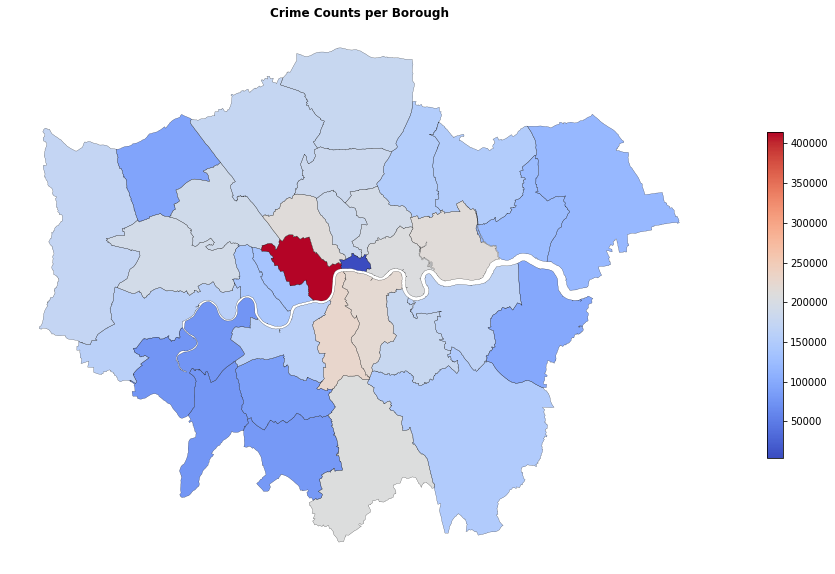

In [65]:
# plot 1

ax = shape_clean.boundary.plot(edgecolor='black', 
                             linewidth=0.2, 
                             figsize=(20,10))
shape_clean.plot(ax=ax, 
                 column='count', # NON-LOGGED
                 legend=True, 
                 cmap='coolwarm',
                 legend_kwds={'shrink':0.6}) # extras: legend_kwds={'shrink':1, 'orientation':'horizontal'}

# to remove the axis cause they don't mean much
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Crime Counts per Borough', weight='bold')

plt.savefig('Crime Counts per Borough.jpeg', dpi=600)
plt.show()

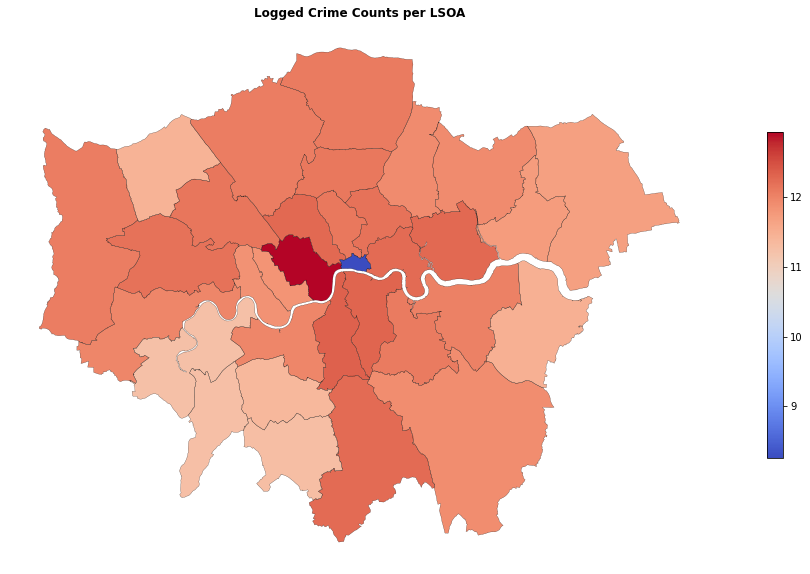

In [66]:
# plot 2

ax = shape_clean.boundary.plot(edgecolor='black', 
                             linewidth=0.2, 
                             figsize=(20,10))
shape_clean.plot(ax=ax, 
                 column='count_log', # LOGGED DATA
                 legend=True, 
                 cmap='coolwarm',
                 legend_kwds={'shrink':0.6}) # extras: legend_kwds={'shrink':1, 'orientation':'horizontal'}

# to remove the axis cause they don't mean much
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Logged Crime Counts per LSOA', weight='bold')

plt.savefig('Logged Crime Counts per Borough.jpeg', dpi=600)
plt.show()

In [25]:
np.linspace(1,15, 15, dtype=int)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### recreate data with borough (wrong join, too much space before)

In [4]:
df_borough = pd.read_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')
df_borough

,Unnamed: 0,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,AreaCode,LSOA_Name,BoroughName
0,0,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Hammersmith and Fulham 012D,Offender given a drugs possession warning,E01001870,Hammersmith and Fulham 012D,Hammersmith and Fulham
1,1,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Hammersmith and Fulham 012D,Offender given a drugs possession warning,E01001870,Hammersmith and Fulham 012D,Hammersmith and Fulham
2,2,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Hammersmith and Fulham 012D,Offender given a drugs possession warning,E01001870,Hammersmith and Fulham 012D,Hammersmith and Fulham
3,3,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Hammersmith and Fulham 012D,Offender given a drugs possession warning,E01001870,Hammersmith and Fulham 012D,Hammersmith and Fulham
4,4,750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...,2013-01,-0.203552,51.491597,On or near Shopping Area,E01001870,Hammersmith and Fulham 012D,Investigation complete; no suspect identified,E01001870,Hammersmith and Fulham 012D,Hammersmith and Fulham
...,...,...,...,...,...,...,...,...,...,...,...,...
26495095,26495095,25d73b1215921f8f570fa5cfb25afe006163411b23fc0f...,2024-01,-0.299881,51.380709,On or near Malvern Road,E01002994,Kingston upon Thames 016A,Investigation complete; no suspect identified,E01002994,Kingston upon Thames 016A,Kingston upon Thames
26495096,26495096,8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...,2024-01,-0.301184,51.413811,On or near Walter Street,E01033569,Kingston upon Thames 004G,Investigation complete; no suspect identified,E01033569,Kingston upon Thames 004G,Kingston upon Thames
26495097,26495097,8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...,2024-01,-0.301184,51.413811,On or near Walter Street,E01033569,Kingston upon Thames 004G,Investigation complete; no suspect identified,E01033569,Kingston upon Thames 004G,Kingston upon Thames
26495098,26495098,8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...,2024-01,-0.301184,51.413811,On or near Walter Street,E01033569,Kingston upon Thames 004G,Investigation complete; no suspect identified,E01033569,Kingston upon Thames 004G,Kingston upon Thames


In [9]:
df_borough.drop_duplicates('Crime ID', inplace=True)

In [12]:
df_borough.columns

Index(['Unnamed: 0', 'Crime ID', 'Month', 'Longitude', 'Latitude', 'Location',
       'LSOA code', 'LSOA name', 'Outcome type', 'AreaCode', 'LSOA_Name',
       'BoroughName'],
      dtype='object')

In [14]:
df_borough.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df_borough.drop(['LSOA name', 'AreaCode'], axis=1, inplace=True)

In [21]:
df_borough.reset_index(inplace=True)

In [23]:
df_borough.drop('index', axis=1, inplace=True)

In [25]:
df_borough.to_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')

### dd

In [115]:
df_borough = pd.read_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')

In [116]:
df_borough = df_borough.drop('Unnamed: 0', axis=1)

In [117]:
# set year and month columns
df_borough['year'], df_borough['month'] = df_borough['Month'].str.split('-', 1).str
df_borough

/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_1656/250565762.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_borough['year'], df_borough['month'] = df_borough['Month'].str.split('-', 1).str


,Crime ID,Month,Longitude,Latitude,Location,LSOA code,Outcome type,LSOA_Name,BoroughName,year,month
0,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Offender given a drugs possession warning,Hammersmith and Fulham 012D,Hammersmith and Fulham,2013,01
1,750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...,2013-01,-0.203552,51.491597,On or near Shopping Area,E01001870,Investigation complete; no suspect identified,Hammersmith and Fulham 012D,Hammersmith and Fulham,2013,01
2,21938f414ed8b80c3a02b659832702736a595a541d5574...,2013-01,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Investigation complete; no suspect identified,Hammersmith and Fulham 012E,Hammersmith and Fulham,2013,01
3,38a2922207338b6ff65203c3c292371402925a9651e2ea...,2013-01,-0.212671,51.493427,On or near AURIOL ROAD,E01001871,Suspect charged,Hammersmith and Fulham 012E,Hammersmith and Fulham,2013,01
4,f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...,2013-01,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Investigation complete; no suspect identified,Hammersmith and Fulham 012E,Hammersmith and Fulham,2013,01
...,...,...,...,...,...,...,...,...,...,...,...
5323341,13cb7accfc6a4720a6bd3c3575700316923e660e50b843...,2024-01,-0.293950,51.407267,On or near Kingsworthy Close,E01002971,Investigation complete; no suspect identified,Kingston upon Thames 005C,Kingston upon Thames,2024,01
5323342,53ac09d5d95b9d107cf3c29946a1b3d2c6ed3571156495...,2024-01,-0.245693,51.381789,On or near Lower Green Gardens,E01002978,Investigation complete; no suspect identified,Kingston upon Thames 015B,Kingston upon Thames,2024,01
5323343,2c921d53b77d9ae322c5abcf6b565b175125d11c73afdb...,2024-01,-0.297572,51.407680,On or near Fairfield South,E01002964,Investigation complete; no suspect identified,Kingston upon Thames 005A,Kingston upon Thames,2024,01
5323344,25d73b1215921f8f570fa5cfb25afe006163411b23fc0f...,2024-01,-0.299881,51.380709,On or near Malvern Road,E01002994,Investigation complete; no suspect identified,Kingston upon Thames 016A,Kingston upon Thames,2024,01


In [118]:
df_borough.columns

Index(['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'LSOA code',
       'Outcome type', 'LSOA_Name', 'BoroughName', 'year', 'month'],
      dtype='object')

In [119]:
df_grouped_borough = df_borough[['Crime ID','BoroughName', 'year']].groupby(['BoroughName', 'year'])

In [120]:
df_grouped_borough.count()

Crime ID
BoroughName          year          
Barking and Dagenham 2013     11334
                     2014     10522
                     2015     11604
                     2016     11667
                     2017      9792
...                             ...
Westminster          2020     17136
                     2021     27748
                     2022     70571
                     2023     81287
                     2024      6031

[396 rows x 1 columns]

In [121]:
df_grouped_borough = df_borough.groupby(['BoroughName', 'year'])['Crime ID'].count().reset_index()
df_grouped_borough

,BoroughName,year,Crime ID
0,Barking and Dagenham,2013,11334
1,Barking and Dagenham,2014,10522
2,Barking and Dagenham,2015,11604
3,Barking and Dagenham,2016,11667
4,Barking and Dagenham,2017,9792
...,...,...,...
391,Westminster,2020,17136
392,Westminster,2021,27748
393,Westminster,2022,70571
394,Westminster,2023,81287


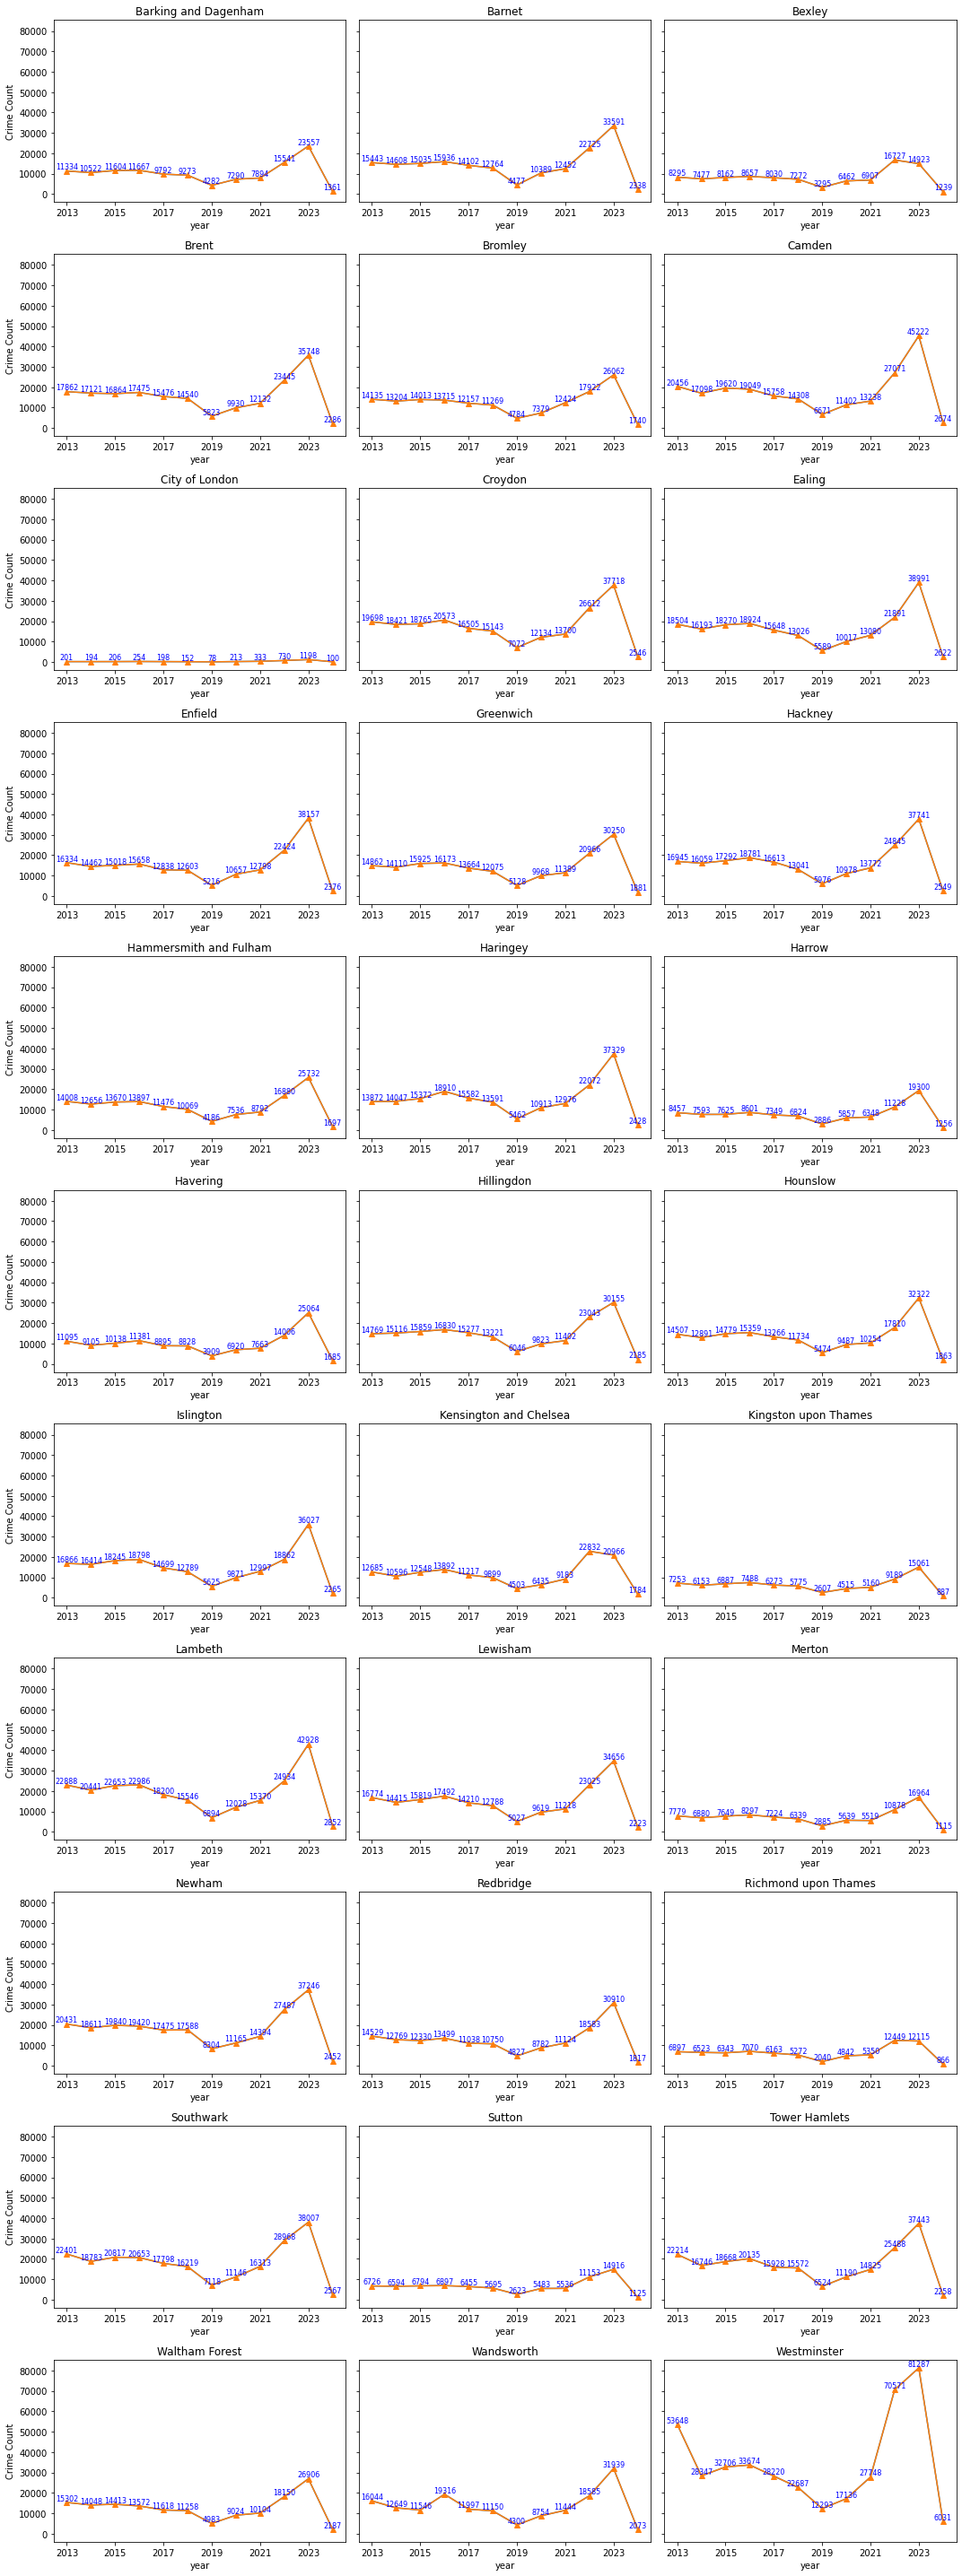

In [137]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(15, 40), sharey=True)
axs = axs.flatten()  

grouped = df_grouped_borough.groupby('BoroughName')

for i, (name, group) in enumerate(grouped):
    group.plot(x='year', y='Crime ID', ax=axs[i], title=name, legend=False)
    axs[i].set_ylabel("Crime Count")
    axs[i].plot(group['year'], group['Crime ID'], marker='^', linestyle='-')
     
    # Annotate each point with its y-value
    for x, y in zip(group['year'], group['Crime ID']):
        axs[i].text(x, y, f'{y}', color='blue', fontsize=8, ha='center', va='bottom')



plt.tight_layout()
plt.savefig('Crimes_per_borough_line_same_Y_annotated.jpg', dpi=600)
plt.show()